<a href="https://colab.research.google.com/github/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/blob/main/Part_1_Deep_Learning_with_PyTorch/week_05/week_5_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

### WEEK 5 Exercises

####Name : Lukman Aliyu Jibril

####email: lukman.j.aliyu@gmail.com


### Exercises:
Please, see week 5 exercises from [**Learn PyTorch for Deep Learning**](https://www.learnpytorch.io/):\
[04. Pytorch Custom Datasets](https://www.learnpytorch.io/04_pytorch_custom_datasets/#exercises)\
[05. Pytorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/#exercises)

# PART ONE: PyTorch Custom Datasets

In [1]:
# Check for GPU
!nvidia-smi

Mon Jan 22 13:00:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn

print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.0+cu121


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

Underfitting occurs when a model is too simple to capture the patterns in the data, leading to poor performance both on the training data and unseen data. Here are three methods to prevent underfitting:

1. Increasing Model Complexity: If a model is too simple, it might not be able to learn the underlying patterns in the data. Increasing the complexity of the model, such as using a more sophisticated machine learning algorithm or adding more layers and neurons in a neural network, can help the model to capture more complex patterns. However, care must be taken to avoid overfitting, where the model becomes too tailored to the training data.

2. Feature Engineering: This involves creating new features or modifying existing ones to make the underlying patterns in the data more accessible to the model. This could mean adding interaction terms in a regression model, performing transformations on the data, or extracting additional relevant features. Good features can significantly enhance the model's ability to learn effectively from the data.

3. Reducing Regularization: Regularization techniques (like L1 or L2 regularization) are used to prevent overfitting by penalizing larger or more complex models. However, if underfitting is occurring, reducing the regularization can give the model more flexibility to learn from the data. It's a delicate balance, as too little regularization can lead to overfitting, especially in complex models.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# get the data
import requests
import zipfile
from pathlib import Path
#set up path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_sushi_steak"

# if image path is a directory, do not download it
if image_path.is_dir():
    print(f"{image_path} directory exists")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True,exist_ok=True)
    # download pizza sushi and steak data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)



Did not find data/pizza_sushi_steak directory, creating one...
Unzipping pizza, steak, sushi data...


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
# walk through the path
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_sushi_steak'.
There are 3 directories and 0 images in 'data/pizza_sushi_steak/train'.
There are 0 directories and 78 images in 'data/pizza_sushi_steak/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_sushi_steak/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_sushi_steak/train/steak'.
There are 3 directories and 0 images in 'data/pizza_sushi_steak/test'.
There are 0 directories and 25 images in 'data/pizza_sushi_steak/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_sushi_steak/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_sushi_steak/test/steak'.


In [6]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_sushi_steak/train'),
 PosixPath('data/pizza_sushi_steak/test'))

[PosixPath('data/pizza_sushi_steak/train/pizza/3530210.jpg'), PosixPath('data/pizza_sushi_steak/train/pizza/320570.jpg'), PosixPath('data/pizza_sushi_steak/train/pizza/1654444.jpg')]
Random Image path: data/pizza_sushi_steak/train/pizza/2821048.jpg
Image class: pizza
Image height: 512
Image width: 512


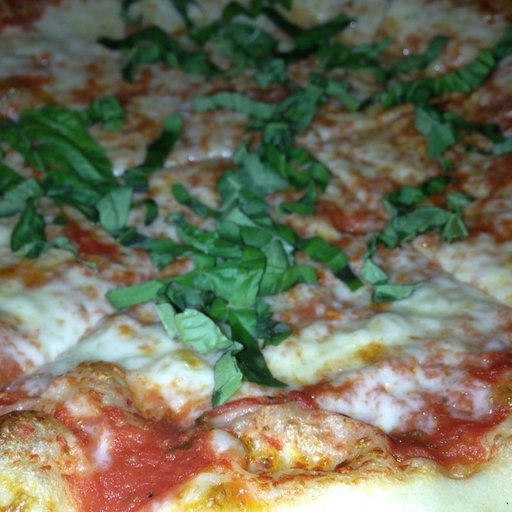

In [7]:
# Visualize an image
import random
from PIL import Image

#set seed
random.seed(42) # 42 is common in data science: has a meaning
# 1. Get all image paths as a list
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:3])
# 2. Get random image path
random_image_path = random.choice(image_path_list)
# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
# 4 Open image
img = Image.open(random_image_path)
# 5 Print meta
print(f"Random Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


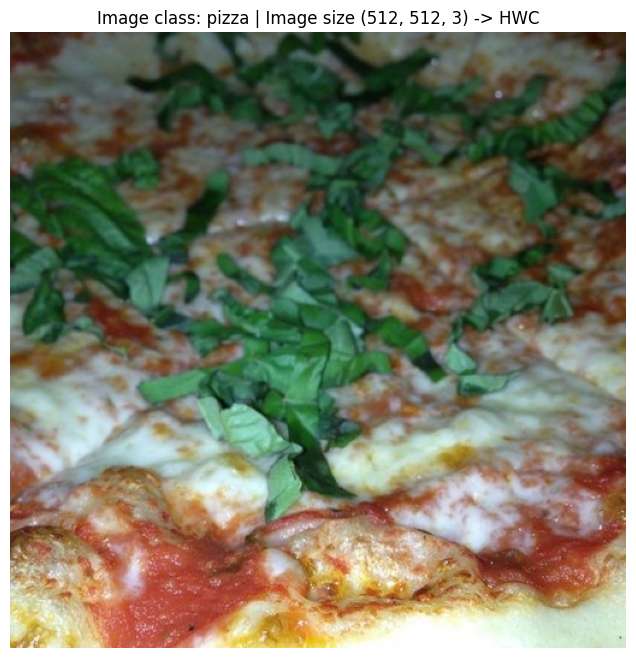

In [8]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt
img_as_array = np.array(img)
plt.figure(figsize= (8,8))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image size {img_as_array.shape} -> HWC")
plt.axis("off")
plt.show()

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [9]:
# 3.1 Transforming data with torchvision.transforms
from torchvision.transforms import v2
data_transform = v2.Compose([
    v2.Resize(size=(64,64)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])
data_transform

Compose(
      Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=warn)
      RandomHorizontalFlip(p=0.5)
      ToImage()
      ToDtype(scale=True)
)

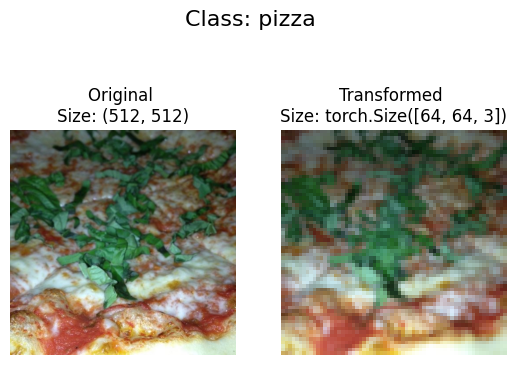

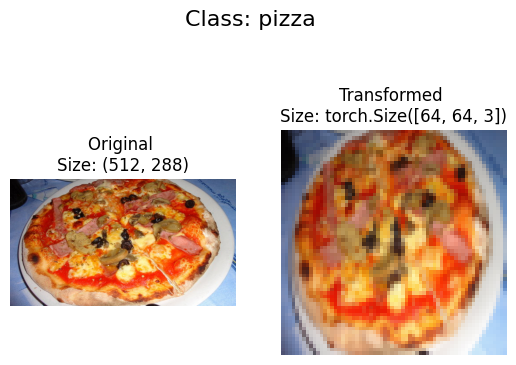

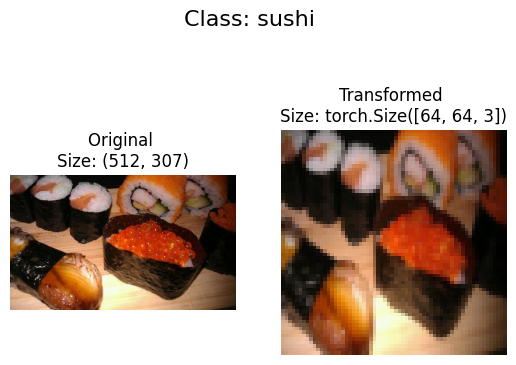

In [10]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

### Load image data using `ImageFolder`

In [11]:
# Use ImageFolder to create dataset(s)
from torchvision.datasets import ImageFolder
train_data = ImageFolder(train_dir,transform=data_transform,target_transform=None)
test_data =  ImageFolder(root=test_dir,transform=data_transform,target_transform=None)
print(f"Train data: {train_data} \n Test data: {test_data}")



Train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_sushi_steak/train
    StandardTransform
Transform: Compose(
                 Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 RandomHorizontalFlip(p=0.5)
                 ToImage()
                 ToDtype(scale=True)
           ) 
 Test data: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_sushi_steak/test
    StandardTransform
Transform: Compose(
                 Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 RandomHorizontalFlip(p=0.5)
                 ToImage()
                 ToDtype(scale=True)
           )


In [12]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [13]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [14]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [15]:
# Turn train and test Datasets into DataLoaders
BATCH_SIZE = 32
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e85b85e5f00>,
 <torch.utils.data.dataloader.DataLoader at 0x7e85b85e5f60>)

In [16]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(8, 3)

In [17]:
# iterable
img,label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [18]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) #
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):

        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [19]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install -q torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## 4. Create training and testing functions for `model_0`.

In [20]:

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

      # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for X,y in dataloader:

        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate and accumulate loss
        loss = loss_fn(y_pred,y)
        train_loss += loss


         # 3. Optimizer zero grad
        optimizer.zero_grad()


         # 4. Loss backward
        loss.backward()


        # 5. Optimizer step
        optimizer.step()


       # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(y_pred,dim=1)
        train_acc += (y == y_pred_class).sum().item()/len(y_pred)


  # Adjust metrics to get average loss and average accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc


In [21]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():


    # Loop through DataLoader batches
    for X,y in dataloader:

      # Send data to target device
      X,y = X.to(device), y.to(device)


      # 1. Forward pass
      y_pred = model(X)


      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred,y)
      test_loss+= loss


      # Calculate and accumulate accuracy
      y_pred_class = torch.argmax(y_pred,dim=1)
      test_acc += (y == y_pred_class).sum().item()/len(y_pred)


      # Adjust metrics to get average loss and accuracy per batch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc


In [22]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [23]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

model_0_results_05 = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1073 | train_acc: 0.2461 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.1144 | train_acc: 0.3047 | test_loss: 1.1286 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0892 | train_acc: 0.4258 | test_loss: 1.1007 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1123 | train_acc: 0.3047 | test_loss: 1.1050 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0959 | train_acc: 0.2969 | test_loss: 1.1207 | test_acc: 0.2604


In [24]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

model_0_results_20 = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0946 | train_acc: 0.3242 | test_loss: 1.0949 | test_acc: 0.2812
Epoch: 2 | train_loss: 1.0935 | train_acc: 0.3203 | test_loss: 1.1043 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0737 | train_acc: 0.4883 | test_loss: 1.0788 | test_acc: 0.2917
Epoch: 4 | train_loss: 1.0731 | train_acc: 0.3281 | test_loss: 1.0822 | test_acc: 0.2917
Epoch: 5 | train_loss: 1.0884 | train_acc: 0.4062 | test_loss: 1.1087 | test_acc: 0.2812
Epoch: 6 | train_loss: 0.9941 | train_acc: 0.5547 | test_loss: 1.1126 | test_acc: 0.2917
Epoch: 7 | train_loss: 1.0748 | train_acc: 0.3711 | test_loss: 1.0741 | test_acc: 0.3229
Epoch: 8 | train_loss: 0.9818 | train_acc: 0.4844 | test_loss: 0.9909 | test_acc: 0.5227
Epoch: 9 | train_loss: 0.9769 | train_acc: 0.5000 | test_loss: 1.0114 | test_acc: 0.4337
Epoch: 10 | train_loss: 0.8098 | train_acc: 0.6406 | test_loss: 0.9361 | test_acc: 0.5729
Epoch: 11 | train_loss: 0.8615 | train_acc: 0.6133 | test_loss: 0.9552 | test_acc: 0.4025
Epoch: 12 | train_l

In [25]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)


model_0_results_50 = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=50)


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7430 | train_acc: 0.7109 | test_loss: 1.0091 | test_acc: 0.4138
Epoch: 2 | train_loss: 0.7324 | train_acc: 0.7070 | test_loss: 1.0993 | test_acc: 0.4138
Epoch: 3 | train_loss: 0.8339 | train_acc: 0.6055 | test_loss: 0.9901 | test_acc: 0.4754
Epoch: 4 | train_loss: 0.9133 | train_acc: 0.5156 | test_loss: 0.9644 | test_acc: 0.4545
Epoch: 5 | train_loss: 0.9971 | train_acc: 0.6250 | test_loss: 1.0501 | test_acc: 0.3731
Epoch: 6 | train_loss: 0.6484 | train_acc: 0.7305 | test_loss: 0.9885 | test_acc: 0.3939
Epoch: 7 | train_loss: 0.8054 | train_acc: 0.5469 | test_loss: 1.0079 | test_acc: 0.4129
Epoch: 8 | train_loss: 0.7032 | train_acc: 0.6992 | test_loss: 0.9349 | test_acc: 0.4744
Epoch: 9 | train_loss: 0.7885 | train_acc: 0.6016 | test_loss: 0.9745 | test_acc: 0.5464
Epoch: 10 | train_loss: 0.6194 | train_acc: 0.7344 | test_loss: 0.9129 | test_acc: 0.5331
Epoch: 11 | train_loss: 0.6774 | train_acc: 0.7422 | test_loss: 0.9976 | test_acc: 0.4848
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [26]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

model_1_results_20 = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)



  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4345 | train_acc: 0.8398 | test_loss: 1.1043 | test_acc: 0.1979
Epoch: 2 | train_loss: 0.3663 | train_acc: 0.8477 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 3 | train_loss: 0.3966 | train_acc: 0.8125 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 4 | train_loss: 0.3829 | train_acc: 0.8477 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 5 | train_loss: 0.4827 | train_acc: 0.7539 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 6 | train_loss: 0.3437 | train_acc: 0.8828 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 7 | train_loss: 0.3119 | train_acc: 0.8750 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 8 | train_loss: 0.2686 | train_acc: 0.8828 | test_loss: 1.1038 | test_acc: 0.1979
Epoch: 9 | train_loss: 0.2686 | train_acc: 0.8984 | test_loss: 1.1042 | test_acc: 0.1979
Epoch: 10 | train_loss: 0.2569 | train_acc: 0.9062 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 11 | train_loss: 0.2471 | train_acc: 0.9062 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 12 | train_l

In [27]:
summary(model_1, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 20, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 20, 64, 64]           560
│    └─ReLU: 2-2                         [1, 20, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 20, 64, 64]           3,620
│    └─ReLU: 2-4                         [1, 20, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 20, 32, 32]           --
├─Sequential: 1-2                        [1, 20, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 20, 32, 32]           3,620
│    └─ReLU: 2-7                         [1, 20, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 20, 32, 32]           3,620
│    └─ReLU: 2-9                         [1, 20, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 20, 16, 16]           --
├─Seq

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [28]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [29]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.


Excellent, we now have double the training and testing images...

In [30]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [31]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64),antialias=True),
  transforms.ToTensor()
])

train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)

In [32]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8770 | train_acc: 0.6792 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 2 | train_loss: 0.8655 | train_acc: 0.7104 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 3 | train_loss: 0.8838 | train_acc: 0.7104 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 4 | train_loss: 0.8843 | train_acc: 0.6792 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 5 | train_loss: 0.8671 | train_acc: 0.7104 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 6 | train_loss: 0.9211 | train_acc: 0.6792 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 7 | train_loss: 0.8586 | train_acc: 0.7104 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 8 | train_loss: 0.8862 | train_acc: 0.6792 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 9 | train_loss: 0.8643 | train_acc: 0.7104 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 10 | train_loss: 0.9062 | train_acc: 0.6792 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 11 | train_loss: 0.8709 | train_acc: 0.7104 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [33]:
# Get a custom image
import requests
url = "https://github.com/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/raw/main/data/images/pizza.jpeg"
custom_image = "pizza.jpeg"
with open(custom_image, "wb") as f:
  response = requests.get(url)
  f.write(response.content)


In [34]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)


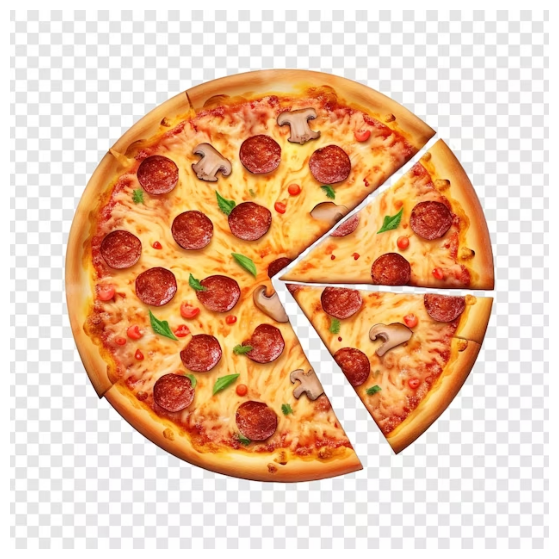

In [35]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


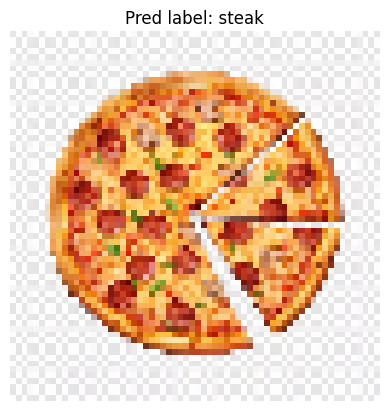

In [36]:
# Make a prediction on the image
model_2.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_2(batch)

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);

Wrong unfortunately. It doesn't get it right. The model is not good enough. Needs more work

# PART TWO: PyTorch Going Modular

## 1. Turn the code to get the data (from section 1. Get Data) into a Python script, such as `get_data.py`.

* When you run the script using `python get_data.py` it should check if the data already exists and skip downloading if it does.
* If the data download is successful, you should be able to access the `pizza_steak_sushi` images from the `data` directory.

In [37]:
# YOUR CODE HERE
%%writefile get_data.py

"""
Contains functionality for getting and downloading data
"""

import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

# Remove zip file
os.remove(data_path / "pizza_steak_sushi.zip")


Writing get_data.py


In [38]:
# Example running of get_data.py
!python get_data.py

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


## 2. Use [Python's `argparse` module](https://docs.python.org/3/library/argparse.html) to be able to send the `train.py` custom hyperparameter values for training procedures.
* Add an argument flag for using a different:
  * Training/testing directory
  * Learning rate
  * Batch size
  * Number of epochs to train for
  * Number of hidden units in the TinyVGG model
    * Keep the default values for each of the above arguments as what they already are (as in notebook 05).
* For example, you should be able to run something similar to the following line to train a TinyVGG model with a learning rate of 0.003 and a batch size of 64 for 20 epochs: `python train.py --learning_rate 0.003 batch_size 64 num_epochs 20`.
* **Note:** Since `train.py` leverages the other scripts we created in section 05, such as, `model_builder.py`, `utils.py` and `engine.py`, you'll have to make sure they're available to use too. You can find these in the [`going_modular` folder on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular/going_modular).

In [39]:
#First a function to download all the required files from my repo
def download_file_from_github(filename):
    """
    Download a file from the going_modular directory of my ArewaDS DeepLearning assignments GitHub repository.

    Args:
    filename (str): Name of the file to be downloaded.

    """
    import requests
    base_url = "https://raw.githubusercontent.com/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/main/data/going_modular/"
    response = requests.get(base_url + filename)

    if response.status_code == 200:
        # Save the file
        with open(filename,"wb") as f:
            f.write(response.content)
        print(f"File {filename} downloaded successfully.")
    else:
        print(f"Failed to download {filename}. HTTP status code: {response.status_code}")

# start with model_builder.phy
download_file_from_github("model_builder.py")


File model_builder.py downloaded successfully.


In [40]:
# downloading the others
download_file_from_github("utils.py"),download_file_from_github("engine.py"),download_file_from_github("data_setup.py")

File utils.py downloaded successfully.
File engine.py downloaded successfully.
File data_setup.py downloaded successfully.


(None, None, None)

In [41]:
# YOUR CODE HERE
%%writefile train.py
"""
Trains a PyTorch image classification model using device-agnostic code.
"""

import os
import argparse
import torch
from torchvision.transforms import v2

import data_setup, engine, model_builder, utils

# Argument parser for command line arguments
parser = argparse.ArgumentParser(description="Train a TinyVGG model on a specified dataset")
parser.add_argument("--train_dir", type=str, default="data/pizza_steak_sushi/train", help="Directory for training data")
parser.add_argument("--test_dir", type=str, default="data/pizza_steak_sushi/test", help="Directory for testing data")
parser.add_argument("--learning_rate", type=float, default=0.001, help="Learning rate for training")
parser.add_argument("--batch_size", type=int, default=32, help="Batch size for training and testing")
parser.add_argument("--num_epochs", type=int, default=5, help="Number of epochs to train for")
parser.add_argument("--hidden_units", type=int, default=10, help="Number of hidden units in TinyVGG model")

args = parser.parse_args()

# Use the arguments
NUM_EPOCHS = args.num_epochs
BATCH_SIZE = args.batch_size
HIDDEN_UNITS = args.hidden_units
LEARNING_RATE = args.learning_rate
train_dir = args.train_dir
test_dir = args.test_dir

# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = v2.Compose([
  v2.Resize((64, 64)),
  v2.ToImage(),
  v2.ToDtype(torch.float32, scale=True),
])

# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transform,
    batch_size=BATCH_SIZE
)

# Create model with help from model_builder.py
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

# Set loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# Save the model with help from utils.py
utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_going_modular_script_mode_tinyvgg_model.pth")


Writing train.py


In [51]:
# Example running of train.py
!python train.py --num_epochs 10 --batch_size 128 --hidden_units 128 --learning_rate 0.0003


  0% 0/10 [00:00<?, ?it/s]Epoch: 1 | train_loss: 1.1133 | train_acc: 0.3229 | test_loss: 1.1075 | test_acc: 0.4267
 10% 1/10 [00:01<00:14,  1.57s/it]Epoch: 2 | train_loss: 1.0949 | train_acc: 0.4526 | test_loss: 1.0936 | test_acc: 0.3333
 20% 2/10 [00:02<00:11,  1.38s/it]Epoch: 3 | train_loss: 1.0874 | train_acc: 0.3548 | test_loss: 1.0850 | test_acc: 0.3467
 30% 3/10 [00:03<00:08,  1.26s/it]Epoch: 4 | train_loss: 1.0747 | train_acc: 0.3782 | test_loss: 1.0744 | test_acc: 0.3733
 40% 4/10 [00:05<00:07,  1.21s/it]Epoch: 5 | train_loss: 1.0477 | train_acc: 0.4699 | test_loss: 1.0529 | test_acc: 0.4133
 50% 5/10 [00:06<00:06,  1.29s/it]Epoch: 6 | train_loss: 1.0203 | train_acc: 0.4901 | test_loss: 1.0331 | test_acc: 0.4133
 60% 6/10 [00:08<00:05,  1.47s/it]Epoch: 7 | train_loss: 0.9769 | train_acc: 0.5713 | test_loss: 1.0076 | test_acc: 0.4667
 70% 7/10 [00:09<00:04,  1.43s/it]Epoch: 8 | train_loss: 0.9263 | train_acc: 0.5588 | test_loss: 0.9958 | test_acc: 0.3733
 80% 8/10 [00:10<00:02, 

## 3. Create a Python script to predict (such as `predict.py`) on a target image given a file path with a saved model.

* For example, you should be able to run the command `python predict.py some_image.jpeg` and have a trained PyTorch model predict on the image and return its prediction.
* To see example prediction code, check out the [predicting on a custom image section in notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function).
* You may also have to write code to load in a trained model.

In [43]:
# YOUR CODE HERE

%%writefile predict.py
import torch
import torchvision.transforms as transforms
import torchvision
import argparse
import model_builder

def load_model(model_path, device):
    """
    Loads a TinyVGG model from the specified file path.

    Args:
    model_path (str): Path to the model file.
    device (str): The device to load the model on ('cuda' or 'cpu').

    Returns:
    torch.nn.Module: Loaded PyTorch model.
    """
    model = model_builder.TinyVGG(input_shape=3, hidden_units=128, output_shape=3)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

def preprocess_image(image_path):
    """
    Preprocesses the image for model prediction.

    Args:
    image_path (str): Path to the image file.

    Returns:
    torch.Tensor: Preprocessed image tensor.
    """
    image = torchvision.io.read_image(image_path).type(torch.float32)
    image = image / 255.0  # Normalize to [0, 1]
    transform = transforms.Resize(size=(64, 64))
    return transform(image)

def predict_image(model, image, device):
    """
    Predicts the class for the given image using the specified model.

    Args:
    model (torch.nn.Module): The trained model for prediction.
    image (torch.Tensor): The preprocessed image tensor.
    device (str): The device to perform prediction on ('cuda' or 'cpu').

    Returns:
    str, float: Predicted class name and the probability.
    """
    class_names = ["pizza", "steak", "sushi"]
    image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
    with torch.inference_mode():
        pred_logits = model(image)
        pred_prob = torch.softmax(pred_logits, dim=1)
        pred_label = torch.argmax(pred_prob, dim=1)
    return class_names[pred_label], pred_prob.max().item()

def main(image_path, model_path):
    """
    Main function to handle model prediction on the given image.

    Args:
    image_path (str): Path to the target image.
    model_path (str): Path to the trained model file.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"[INFO] Predicting on image: {image_path}")

    # Load the model and preprocess the image
    model = load_model(model_path, device)
    image = preprocess_image(image_path)

    # Predict and print the result
    pred_class, pred_prob = predict_image(model, image, device)
    print(f"[INFO] Predicted class: {pred_class}, Probability: {pred_prob:.3f}")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Image Classification Prediction")
    parser.add_argument("--image", required=True, help="Path to the target image for prediction")
    parser.add_argument("--model_path", default="models/05_going_modular_script_mode_tinyvgg_model.pth", type=str, help="Path to the trained model file")
    args = parser.parse_args()
    main(args.image, args.model_path)


Writing predict.py


In [44]:
# Get a pizza picture from my repo to try out the predict.py
import requests
url = "https://github.com/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/raw/main/data/images/"
custom_images = ["pizza.jpeg","sushi.jpeg","steak.jpeg"]
for image in custom_images:
  with open(image, "wb") as f:
    response = requests.get(url + image)
    f.write(response.content)



In [52]:
# Example running of predict.py on a pizza image
!python predict.py --image pizza.jpeg

[INFO] Predicting on image: pizza.jpeg
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
[INFO] Predicted class: pizza, Probability: 0.669


It predicted the right class, however the probability is quite low, less than 50% which is not acceptable. It is important to improve the model and get a better probability, above 90 percent will not be bad.

In [53]:
# on a sushi image

!python predict.py --image sushi.jpeg

[INFO] Predicting on image: sushi.jpeg
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
[INFO] Predicted class: pizza, Probability: 0.594


In [54]:
# on a steak image
!python predict.py --image steak.jpeg

[INFO] Predicting on image: steak.jpeg
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
[INFO] Predicted class: steak, Probability: 0.434


The model's performance on classifying images of pizza and steak was spot-on, demonstrating its robustness in recognizing these items. Although it did not successfully identify sushi, the overall accuracy is commendable. This suggests that the model is quite effective (in it's own level, lol), and with some fine-tuning, it has the potential to achieve even greater accuracy.







SUBMIT ASSIGNMENT HERE: [CLICK ME ▶️](https://forms.gle/876vi4aNoFf4A2mU7)